In [20]:
# from https://github.com/szczurek-lab/hydramp/blob/4f9a5fb01c1d812bd0641f185ae1195669d037bf/amp/utils/phys_chem_propterties.py#L4

from typing import Dict, List

import modlamp.analysis as manalysis
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:

hydrophilic = ['R', 'N', 'D', 'Q', 'E', 'K']
aa_with_positive_charge = ['K', 'R', 'H']
aa_with_negative_charge = ['D', 'E']


def calculate_hydrophobicity(data: List[str]) -> np.ndarray:
    h = manalysis.GlobalAnalysis(data)
    h.calc_H(scale='eisenberg')
    return h.H[0]


def calculate_hydrophobicmoment(data: List[str]) -> np.ndarray:
    h = manalysis.PeptideDescriptor(data, 'eisenberg')
    h.calculate_moment()
    return h.descriptor.flatten()


def calculate_charge(data: List[str]) -> np.ndarray:
    h = manalysis.GlobalAnalysis(data)
    h.calc_charge()
    return h.charge[0]


def calculate_isoelectricpoint(data: List[str]) -> np.ndarray:
    h = manalysis.GlobalDescriptor(data)
    h.isoelectric_point()
    return h.descriptor.flatten()


def calculate_length(sequences: List[str]) -> np.ndarray:
    return np.array([len(seq) for seq in sequences])


def calculate_physchem_prop(sequences: List[str]) -> Dict[str, object]:
    return {
        "length": calculate_length(sequences).tolist(),
        "hydrophobicity": calculate_hydrophobicity(sequences).tolist(),
        "hydrophobic_moment": calculate_hydrophobicmoment(sequences).tolist(),
        "charge": calculate_charge(sequences).tolist(),
        "isoelectric_point": calculate_isoelectricpoint(sequences).tolist(),
    }

In [5]:
data_path = '/home/ulamaca/projects/14_ngs2_mo_pep_opt/assets/processed/mic_data_rf_scored.csv'
df = pd.read_csv(data_path)

In [14]:
#

,length,hydrophobicity,hydrophobic_moment,charge,isoelectric_point
0,33,0.312727,0.322218,4.095,10.690430
1,28,0.053571,0.315483,4.997,10.839355
2,16,0.423750,0.249348,1.996,10.025391
3,40,-0.185750,0.308045,5.790,8.726318
4,10,0.384000,0.231966,1.996,10.742188
...,...,...,...,...,...
4541,12,0.006667,0.097656,4.995,11.427734
4542,34,0.017353,0.147209,4.994,10.861816
4543,19,0.057895,0.262534,3.093,10.239746
4544,15,-0.172000,0.502997,6.994,11.586914


In [18]:
df_pc = pd.DataFrame(calculate_physchem_prop(df['sequence'].to_list()))

# join by index
df_ = pd.merge(df_pc, df, left_index=True, right_index=True)

In [19]:
df_.head(5)

,length,hydrophobicity,hydrophobic_moment,charge,isoelectric_point,sequence,value,activity,p_hemo,p_actv
0,33,0.312727,0.322218,4.095,10.690430,AAAAAAAAAAGIGKFLHSAKKFGKAFVGEIMNS,2.099950,0,0.649282,0.503293
1,28,0.053571,0.315483,4.997,10.839355,AAAAAAAIKMLMDLVNERIMALNKKAKK,1.000000,1,0.376916,0.482530
2,16,0.423750,0.249348,1.996,10.025391,AAAKAALNAVLVGANA,1.903090,0,0.163919,0.126593
3,40,-0.185750,0.308045,5.790,8.726318,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,0.250463,1,0.504457,0.520045
4,10,0.384000,0.231966,1.996,10.742188,AAGMGFFGAR,1.108874,1,0.899683,0.176045


<AxesSubplot:>

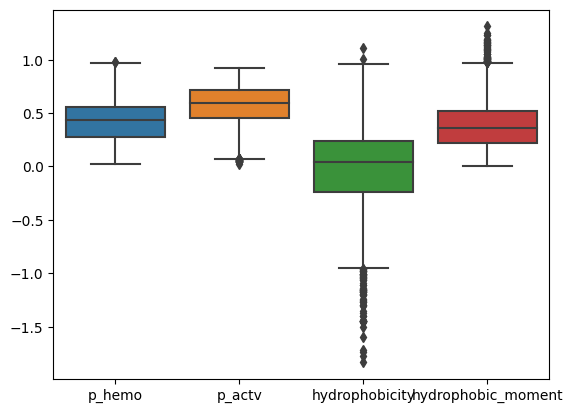

In [25]:
sns.boxplot(data=df_[['p_hemo', 'p_actv', 'hydrophobicity','hydrophobic_moment']])

<AxesSubplot:>

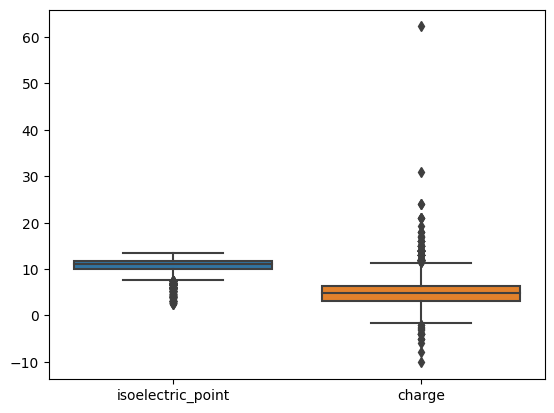

In [28]:
sns.boxplot(data=df_[['isoelectric_point', 'charge']])

In [32]:
df_

,length,hydrophobicity,hydrophobic_moment,charge,isoelectric_point,sequence,value,activity,p_hemo,p_actv
0,33,0.312727,0.322218,4.095,10.690430,AAAAAAAAAAGIGKFLHSAKKFGKAFVGEIMNS,2.099950,0,0.649282,0.503293
1,28,0.053571,0.315483,4.997,10.839355,AAAAAAAIKMLMDLVNERIMALNKKAKK,1.000000,1,0.376916,0.482530
2,16,0.423750,0.249348,1.996,10.025391,AAAKAALNAVLVGANA,1.903090,0,0.163919,0.126593
3,40,-0.185750,0.308045,5.790,8.726318,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,0.250463,1,0.504457,0.520045
4,10,0.384000,0.231966,1.996,10.742188,AAGMGFFGAR,1.108874,1,0.899683,0.176045
...,...,...,...,...,...,...,...,...,...,...
4541,12,0.006667,0.097656,4.995,11.427734,YVLWKRKRWIFI,1.778151,0,0.389343,0.533737
4542,34,0.017353,0.147209,4.994,10.861816,YVPLPNVPQPGRRPFPTFPGQGPFNPKIKWPQGY,0.548456,1,0.487182,0.716294
4543,19,0.057895,0.262534,3.093,10.239746,YVPPVQKPHPNGPKFPTFP,1.364542,1,0.549516,0.410878
4544,15,-0.172000,0.502997,6.994,11.586914,YWKKWKKLRRIFMLV,-0.020287,1,0.457708,0.570691


<AxesSubplot:xlabel='activity', ylabel='p_actv'>

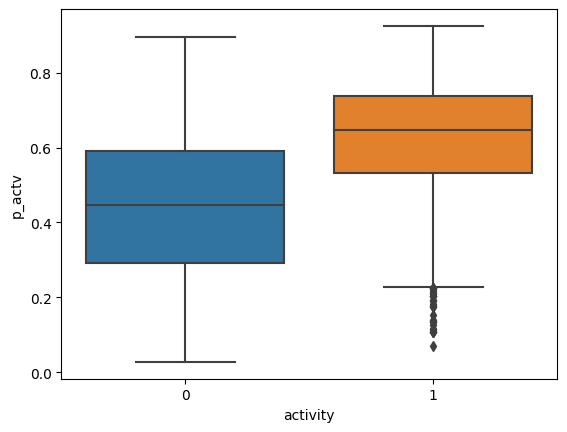

In [38]:
sns.boxplot(data=df_, x='activity', y='p_actv')

<AxesSubplot:xlabel='activity', ylabel='value'>

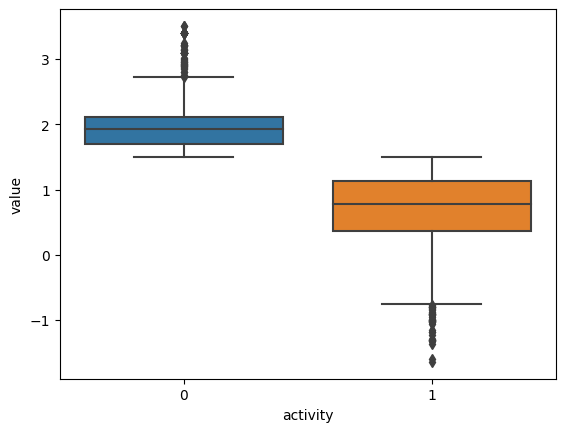

In [39]:
sns.boxplot(data=df_, x='activity', y='value')